In [76]:
# Importing data and reading libraries
import mlflow
from mlflow import log_metric, log_param, log_artifacts
import numpy as np
import pandas as pd
import seaborn as sns


mlflow.set_tracking_uri("http://localhost:5001")
mlflow.set_experiment('BreastCancer')

population_df = pd.read_csv("data/tidy_table.csv")
population_df

,dob,velicina_mm,hist_tip,gradus,er,pr,her2,ki67,imunofenotip,broj_meta
0,61,0.8,NOSinvazivnikarcinom,2,95.0,70,0,95.0,luminal_B,0
1,75,1.8,NOSinvazivnikarcinom,2,100.0,100,3,35.0,luminal_B_Hp,1
2,65,1.2,NOSinvazivnikarcinom,2,100.0,15,3,20.0,luminal_B_Hp,0
3,71,3.0,NOSinvazivnikarcinom,2,85.0,3,2,35.0,luminal_B,4
4,82,3.0,NOSinvazivnikarcinom,2,0.0,0,0,50.0,3n,1
...,...,...,...,...,...,...,...,...,...,...
9957,43,0.5,NOSinvazivnikarcinom,2,100.0,35,1,42.0,luminal_B,5
9958,66,4.8,NOSinvazivnikarcinom,2,100.0,90,0,44.0,luminal_B,2
9959,57,0.8,NOSinvazivnikarcinom,2,25.0,25,1,34.0,luminal_B,3
9960,46,1.6,NOSinvazivnikarcinom,2,100.0,1,0,42.0,luminal_B,2


In [77]:
population_df['limf_cvor'] = population_df['broj_meta'].apply(lambda x: 1 if x > 0 else 0)
population_df = population_df.drop(['broj_meta'], axis=1)
population_df

,dob,velicina_mm,hist_tip,gradus,er,pr,her2,ki67,imunofenotip,limf_cvor
0,61,0.8,NOSinvazivnikarcinom,2,95.0,70,0,95.0,luminal_B,0
1,75,1.8,NOSinvazivnikarcinom,2,100.0,100,3,35.0,luminal_B_Hp,1
2,65,1.2,NOSinvazivnikarcinom,2,100.0,15,3,20.0,luminal_B_Hp,0
3,71,3.0,NOSinvazivnikarcinom,2,85.0,3,2,35.0,luminal_B,1
4,82,3.0,NOSinvazivnikarcinom,2,0.0,0,0,50.0,3n,1
...,...,...,...,...,...,...,...,...,...,...
9957,43,0.5,NOSinvazivnikarcinom,2,100.0,35,1,42.0,luminal_B,1
9958,66,4.8,NOSinvazivnikarcinom,2,100.0,90,0,44.0,luminal_B,1
9959,57,0.8,NOSinvazivnikarcinom,2,25.0,25,1,34.0,luminal_B,1
9960,46,1.6,NOSinvazivnikarcinom,2,100.0,1,0,42.0,luminal_B,1


<AxesSubplot:>

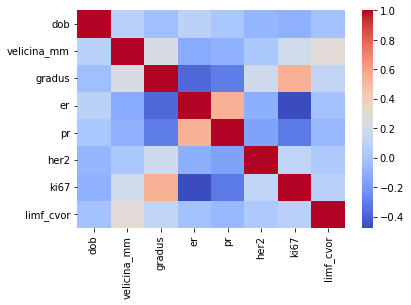

In [78]:
sns.heatmap(population_df.corr(),cmap='coolwarm')

Since "inflamatorni" and "miješani NOS/lobularni" have just 1 row each, we will add them to "drugi rijetki tipovi".

In [79]:
for col in population_df.columns.tolist():
    print(col, " ", population_df[col].unique())

dob   [61 75 65 71 82 58 77 74 80 60 40 59 83 67 69 62 44 72 42 54 39 51 52 63
 46 68 50 37 84 55 73 56 70 31 66 47 53 29 28 64 85 38 78 49 48 45 76 57
 35 79 43 86 41 81 34 90 88 33 36 27 30 87 89 91 32 24 92 93 25 21 94 99]
velicina_mm   [ 0.8   1.8   1.2   3.    3.7   6.    2.8   2.5   2.2   0.7   1.    1.5
  1.7   1.6   2.7   9.    1.3   0.9   2.    0.6   4.8   6.5   2.3   2.4
  3.1   1.4   1.1   1.9   7.8   3.9   0.25  7.    2.6   0.4   5.8   3.5
  5.5   4.2   4.    0.5   5.    2.1  10.    4.5   0.3   8.    3.8  10.5
  0.2   4.9   4.4  14.    4.3   3.2  11.   12.    3.4   0.1   2.9   0.19
  4.7   0.15  8.5  19.    5.2   3.6  22.    7.2   0.35  3.3   4.1   7.5
  0.    0.38  5.7   8.8   4.6   5.1   1.15  9.5   6.6   9.2   6.2  15.
  8.1   6.3  13.    5.4   6.8   8.4  18.5   0.13  6.7   7.6  11.5  12.5
 16.   20.   18.    5.3   5.9   5.6 ]
hist_tip   ['NOSinvazivnikarcinom' 'lobularniinvazivni' 'mucinozniinvazivni'
 'tubularniinvazivni' 'drugirijetkitipovi' 'Casmedularnimkarakteristi

In [80]:
# Creating new column with mean values of ki-67 for each type
population_df['hist_mean'] = population_df.groupby("hist_tip")["ki67"].transform('mean')

# Calculatin difference from the mean
population_df["diff_ki67"]= population_df["ki67"] - population_df["hist_mean"]


In [81]:
numerical_cols = ["dob", "velicina_mm", "er", "pr", "her2", "ki67", "gradus"]
categorical_cols = ["hist_tip", "imunofenotip"]

In [82]:
# # Changing to "drugi rijetki tipovi"
# df_c['histoloski_tip_txt'] = df_c['histoloski_tip_txt'].replace(["inflamatorni"],"drugi rijetki tipovi")

# df_c['histoloski_tip_txt'] = df_c['histoloski_tip_txt'].replace(["miješani NOS/lobularni"],"drugi rijetki tipovi")

# df_c['histoloski_tip_txt'] = df_c['histoloski_tip_txt'].replace(["metaplastični karcinom"],"drugi rijetki tipovi")

# df_c['histoloski_tip_txt'] = df_c['histoloski_tip_txt'].replace(["Ca s apokrinom diferencijacijom"],"drugi rijetki tipovi")

# df_c['histoloski_tip_txt'] = df_c['histoloski_tip_txt'].replace(["mikroinvazivni karcinom"],"drugi rijetki tipovi")

# df_c['histoloski_tip_txt'] = df_c['histoloski_tip_txt'].replace(["tubularni invazivni"],"drugi rijetki tipovi")

In [83]:
for col in population_df.columns.tolist():
    print(col, " ", population_df[col].unique())

dob   [61 75 65 71 82 58 77 74 80 60 40 59 83 67 69 62 44 72 42 54 39 51 52 63
 46 68 50 37 84 55 73 56 70 31 66 47 53 29 28 64 85 38 78 49 48 45 76 57
 35 79 43 86 41 81 34 90 88 33 36 27 30 87 89 91 32 24 92 93 25 21 94 99]
velicina_mm   [ 0.8   1.8   1.2   3.    3.7   6.    2.8   2.5   2.2   0.7   1.    1.5
  1.7   1.6   2.7   9.    1.3   0.9   2.    0.6   4.8   6.5   2.3   2.4
  3.1   1.4   1.1   1.9   7.8   3.9   0.25  7.    2.6   0.4   5.8   3.5
  5.5   4.2   4.    0.5   5.    2.1  10.    4.5   0.3   8.    3.8  10.5
  0.2   4.9   4.4  14.    4.3   3.2  11.   12.    3.4   0.1   2.9   0.19
  4.7   0.15  8.5  19.    5.2   3.6  22.    7.2   0.35  3.3   4.1   7.5
  0.    0.38  5.7   8.8   4.6   5.1   1.15  9.5   6.6   9.2   6.2  15.
  8.1   6.3  13.    5.4   6.8   8.4  18.5   0.13  6.7   7.6  11.5  12.5
 16.   20.   18.    5.3   5.9   5.6 ]
hist_tip   ['NOSinvazivnikarcinom' 'lobularniinvazivni' 'mucinozniinvazivni'
 'tubularniinvazivni' 'drugirijetkitipovi' 'Casmedularnimkarakteristi

In [84]:
# Importing libraries
%pip install catboost
%pip install optuna
%pip install scikit_optimize

import catboost as cb
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler, StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from catboost import CatBoostClassifier
from catboost import Pool, cv
from sklearn.metrics import roc_curve, roc_auc_score
import optuna
from sklearn.preprocessing import OrdinalEncoder
import skopt
import skopt.plots

labels = population_df['limf_cvor']
features = population_df.drop(['limf_cvor'], axis=1)


Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.
Defaulting to user installation because normal site-packages is not writeable

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [85]:
train_features, test_features, train_labels, test_labels = train_test_split(features, labels, test_size = 0.1, random_state=68, stratify=labels)

In [86]:
# Scaling numerical data
train_scaler= StandardScaler()
train_features[numerical_cols]= train_scaler.fit_transform(train_features[numerical_cols])

test_scaler= StandardScaler()
test_features[numerical_cols]= test_scaler.fit_transform(test_features[numerical_cols])

In [87]:
if(len(categorical_cols) != 0):
  train_features = pd.get_dummies(train_features, prefix=categorical_cols, columns=categorical_cols)
  train_features.columns.tolist()
  test_features = pd.get_dummies(test_features, prefix=categorical_cols, columns=categorical_cols)
  train_features.columns.tolist()

In [88]:
for col in train_features.columns.tolist():
    print(col, " ", train_features[col].unique())

dob   [ 1.79977192  0.68982679 -0.34083655 -0.65796373 -0.81652732  0.4519814
 -0.49940014  0.84839038  0.37269961 -2.00575425 -0.73724553  1.08623576
 -0.10299116  1.95833551  0.05557243  1.00695397 -1.1336545   0.5312632
 -0.89580912  0.21413602  1.16551756  0.92767217  2.1168991   0.29341781
 -0.97509091 -1.05437271 -1.37149989 -0.57868194  0.61054499  1.32408115
 -1.29221809 -1.2129363   1.64120833 -0.02370937  1.24479935  0.13485422
 -0.42011834 -2.08503604 -0.18227296 -1.60934527  0.76910858  1.56192653
  2.1961809   1.87905371  1.72049012 -1.53006348 -0.26155475 -1.68862707
  1.40336294  1.48264474 -1.76790886 -1.92647245 -1.84719066  2.0376173
 -2.24359963 -2.56072681 -2.32288143 -1.45078168 -2.16431784 -2.64000861
  2.27546269 -2.7192904   2.59258987 -2.48144502 -2.40216322 -2.95713579
 -2.87785399  2.98899885  2.35474449  2.43402628  2.51330808 -3.19498118]
velicina_mm   [ 5.86796476e-02 -5.80698669e-01 -6.38823970e-01 -5.22573367e-01
 -6.96949272e-01  5.23682059e-01 -9.87575

In [89]:
from sklearn.metrics import roc_curve, roc_auc_score

def calculate_roc(model, X, y):
    y_hat = model.predict_proba(X)
    y_hat = y_hat[:,1].reshape(-1,1)
    y_true = y
    roc_auc = roc_auc_score(y_true, y_hat)
    return(roc_auc)

In [90]:
from datetime import datetime

class Params_Evaluate():
    def __init__(self, X_train, X_val, y_train, y_val):
        self.X_train = X_train
        self.X_val =  X_val
        self.y_train = y_train
        self.y_val = y_val
        self.n=0
        
    def select_model(self, model):
        self.model = model

        
    def evaluate_params(self,params):
        model =  self.model.set_params(**params)
        model.fit(self.X_train, self.y_train)
        
        roc_auc_train = calculate_roc(model, self.X_train, self.y_train)
        roc_auc_val = calculate_roc(model, self.X_val, self.y_val)
        
        print("Iteration {} with ROC-AUC = {:.4f}/{:.4f} (val/train) at {}".format(self.n, roc_auc_val, roc_auc_train, str(datetime.now().time())[:8]))
        self.n+=1
        
        return(1 - roc_auc_val)

In [91]:
params_XGB = {
    #"booster": {"type": "Categorical", "values": ['gbtree', 'gblinear', 'dart']},
    "n_estimators": {"type": "Integer", "low": 0, "high": 2000},
    "learning_rate": {"type": "Real", "low": 0, "high": 0.4},
    "max_depth": {"type": "Integer", "low": 30, "high": 100},
    "min_child_weight": {"type": "Real","low": 0, "high": 100},
    "max_delta_step": {"type": "Real", "low": 0, "high": 100},
    "gamma": {"type": "Real", "low": 0, "high": 10 },
    "colsample_bytree": {"type": "Real", "low": 0, "high": 1},
    "subsample": {"type": "Real", "low": 0, "high": 1},
}

params_RF = {
    

}

In [92]:
params = params_XGB

In [93]:
search_space = []
for key in params:
    if(params[key]["type"] == "Real"):
        search_space.append(skopt.space.Real(params[key]["low"], params[key]["high"], name = key))
    elif(params[key]["type"] == "Integer"):
        search_space.append(skopt.space.Integer(params[key]["low"], params[key]["high"], name = key))
    elif(params[key]["type"] == "Categorical"):
        search_space.append(skopt.space.Categorical(list(params[key]["values"]), name = key))

In [94]:
search_space

[Integer(low=0, high=2000, prior='uniform', transform='identity'),
 Real(low=0, high=0.4, prior='uniform', transform='identity'),
 Integer(low=30, high=100, prior='uniform', transform='identity'),
 Real(low=0, high=100, prior='uniform', transform='identity'),
 Real(low=0, high=100, prior='uniform', transform='identity'),
 Real(low=0, high=1, prior='uniform', transform='identity')]

In [95]:
HPO_params = {
    'n_calls': 2000,
    'n_random_starts': 200,
    'base_estimator': 'ET',
    'acq_func': 'EI',
}

In [96]:
%pip install xgboost
import xgboost as xgb

model = xgb.XGBClassifier(n_jobs=4, eval_metric="auc")

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [97]:
evaluator = Params_Evaluate(train_features, test_features, train_labels, test_labels)

In [98]:
evaluator.select_model(model)

In [99]:
@skopt.utils.use_named_args(search_space)
def objective(**params):
    return evaluator.evaluate_params(params)

In [100]:
%%time
results = skopt.gbrt_minimize(objective, search_space,**HPO_params)

Iteration 0 with ROC-AUC = 0.7195/0.7665 (val/train) at 23:35:18
Iteration 1 with ROC-AUC = 0.7171/0.7836 (val/train) at 23:35:19
Iteration 2 with ROC-AUC = 0.6962/0.9680 (val/train) at 23:35:26
Iteration 3 with ROC-AUC = 0.7474/0.9235 (val/train) at 23:35:29
Iteration 4 with ROC-AUC = 0.7051/0.7409 (val/train) at 23:35:31
Iteration 5 with ROC-AUC = 0.7668/1.0000 (val/train) at 23:35:41
Iteration 6 with ROC-AUC = 0.6951/0.6859 (val/train) at 23:35:41
Iteration 7 with ROC-AUC = 0.7342/0.8773 (val/train) at 23:35:44
Iteration 8 with ROC-AUC = 0.7416/0.9242 (val/train) at 23:35:47
Iteration 9 with ROC-AUC = 0.7160/0.8895 (val/train) at 23:35:50
Iteration 10 with ROC-AUC = 0.7459/0.9999 (val/train) at 23:35:56
Iteration 11 with ROC-AUC = 0.7022/0.9509 (val/train) at 23:36:03
Iteration 12 with ROC-AUC = 0.7494/0.8739 (val/train) at 23:36:05
Iteration 13 with ROC-AUC = 0.7059/0.7059 (val/train) at 23:36:08
Iteration 14 with ROC-AUC = 0.6865/0.8843 (val/train) at 23:36:14
Iteration 15 with RO

<AxesSubplot:title={'center':'Convergence plot'}, xlabel='Number of calls $n$', ylabel='$\\min f(x)$ after $n$ calls'>

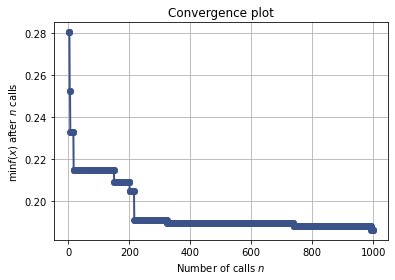

In [101]:
skopt.plots.plot_convergence(results)

array([[<AxesSubplot:xlabel='n_estimators', ylabel='Number of samples'>,
        <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>,
        <AxesSubplot:>],
       [<AxesSubplot:ylabel='learning_rate'>,
        <AxesSubplot:xlabel='learning_rate', ylabel='Number of samples'>,
        <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>],
       [<AxesSubplot:ylabel='max_depth'>, <AxesSubplot:>,
        <AxesSubplot:xlabel='max_depth', ylabel='Number of samples'>,
        <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>],
       [<AxesSubplot:ylabel='min_child_weight'>, <AxesSubplot:>,
        <AxesSubplot:>,
        <AxesSubplot:xlabel='min_child_weight', ylabel='Number of samples'>,
        <AxesSubplot:>, <AxesSubplot:>],
       [<AxesSubplot:ylabel='max_delta_step'>, <AxesSubplot:>,
        <AxesSubplot:>, <AxesSubplot:>,
        <AxesSubplot:xlabel='max_delta_step', ylabel='Number of samples'>,
        <AxesSubplot:>],
       [<AxesSubplot:xlabel='n_estimators'

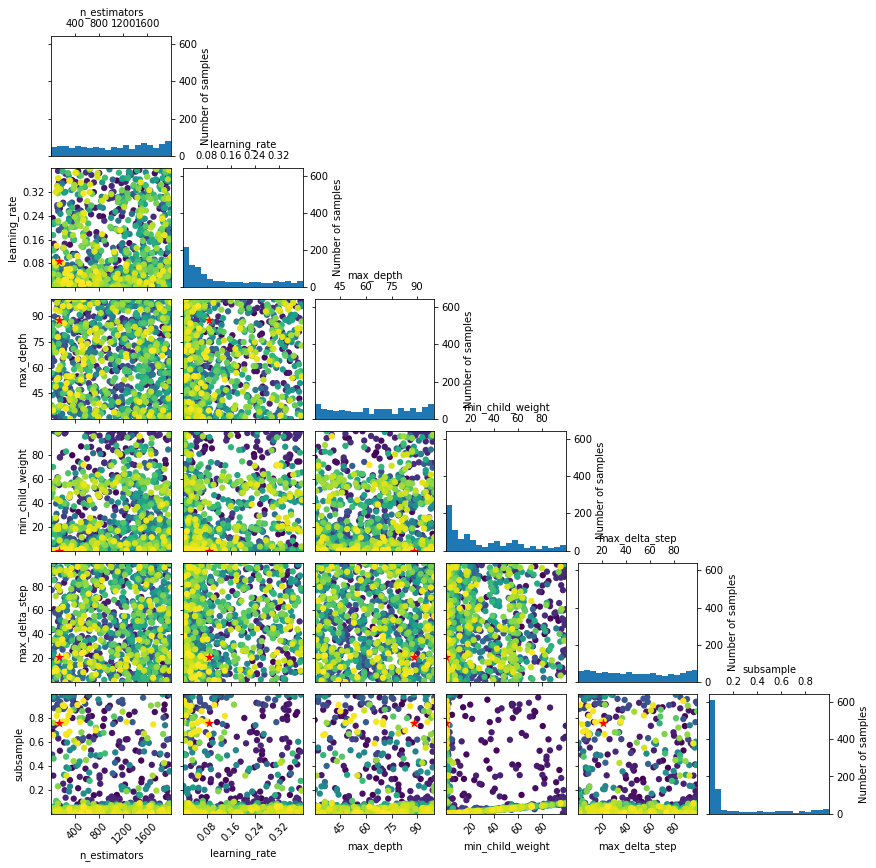

In [102]:
skopt.plots.plot_evaluations(results)

array([[<AxesSubplot:xlabel='n_estimators', ylabel='Partial dependence'>,
        <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>,
        <AxesSubplot:>],
       [<AxesSubplot:ylabel='learning_rate'>,
        <AxesSubplot:xlabel='learning_rate', ylabel='Partial dependence'>,
        <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>],
       [<AxesSubplot:ylabel='max_depth'>, <AxesSubplot:>,
        <AxesSubplot:xlabel='max_depth', ylabel='Partial dependence'>,
        <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>],
       [<AxesSubplot:ylabel='min_child_weight'>, <AxesSubplot:>,
        <AxesSubplot:>,
        <AxesSubplot:xlabel='min_child_weight', ylabel='Partial dependence'>,
        <AxesSubplot:>, <AxesSubplot:>],
       [<AxesSubplot:ylabel='max_delta_step'>, <AxesSubplot:>,
        <AxesSubplot:>, <AxesSubplot:>,
        <AxesSubplot:xlabel='max_delta_step', ylabel='Partial dependence'>,
        <AxesSubplot:>],
       [<AxesSubplot:xlabel='n_estima

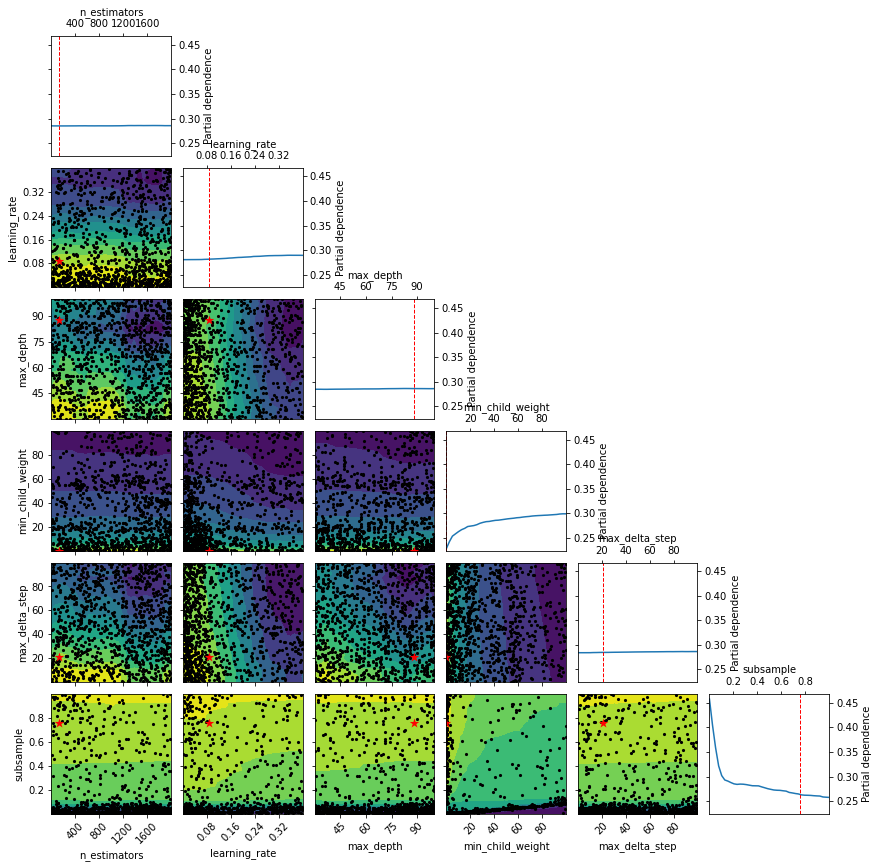

In [103]:
skopt.plots.plot_objective(results)

In [104]:
def to_named_params(results, search_space):
    params = results.x
    param_dict = {}
    params_list  =[(dimension.name, param) for dimension, param in zip(search_space, params)]
    for item in params_list:
        param_dict[item[0]] = item[1]
    
    return(param_dict)

In [105]:
best_params = to_named_params(results, search_space)

In [106]:
best_params 

{'n_estimators': 128,
 'learning_rate': 0.08671448353536176,
 'max_depth': 88,
 'min_child_weight': 0.013514684145188307,
 'max_delta_step': 21.244703068854058,
 'subsample': 0.7559855189079101}

In [107]:
best_model = model.set_params(**best_params )
best_model.__class__

xgboost.sklearn.XGBClassifier

In [108]:
# best_model = xgb.XGBClassifier(
#     tree_method="gpu_hist", colsample_bytree=0.5, learning_rate=0.01, max_depth=20, n_estimators=1000
# )

In [109]:
best_model.fit(train_features, train_labels)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric='auc', gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.08671448353536176, max_bin=256,
              max_cat_to_onehot=4, max_delta_step=21.244703068854058,
              max_depth=88, max_leaves=0, min_child_weight=0.013514684145188307,
              missing=nan, monotone_constraints='()', n_estimators=128,
              n_jobs=4, num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, ...)

In [110]:
train_preds = best_model.predict_proba(train_features)
train_preds = train_preds[:,1].reshape(-1,1)

train_score = roc_auc_score(train_labels, train_preds)
train_score

0.9999993021976052

In [111]:
test_preds = best_model.predict_proba(test_features)
test_preds = test_preds[:,1].reshape(-1,1)

test_score = roc_auc_score(test_labels, test_preds)
test_score

0.8135123170668195

In [112]:
with mlflow.start_run():
    mlflow.log_metric("test score", test_score)
    mlflow.log_metric("train score", train_score)
    
    mlflow.log_param("model", best_model.__class__)
    mlflow.log_param("search space", params)
    mlflow.log_param("HPO", HPO_params)
    mlflow.log_param("best params", best_params)
